In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Testing FNH dataset/RandomOverSampler.xlsx', 'Sheet1')
 
print(df)
df = df.fillna(' ')
#df.dropna(inplace = True)
df.count()
input_array=np.array(df['Content'])

                                                   Title   Len  \
0      Psa: ben stiller speaks out against shaken man...   132   
1      States take back hundreds of thousands of vacc...  7449   
2      On the brink: 16 hours til shutdown – cnn poll...  1357   
3      The us is getting a third coronavirus vaccine....  7855   
4      Coronavirus variant will likely drive a new wa...  3017   
...                                                  ...   ...   
14860  Cops, firefighters challenge gainesville's 'od...   446   
14861  De blasio dodges on high school admissions tes...  3177   
14862  Defense dept. issues covid "vaccination record...   255   
14863  Alaska: cheating husband emasculated after wif...   986   
14864  Woman who drinks 6 cups of coffee per day tryi...   914   

                                                 Content  \
0      Actor ben stiller urges parents with adult kid...   
1      Hundreds of thousands of covid-19 vaccine dose...   
2      a veteran of the shu

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 14865):
    review = re.sub('[^a-zA-Z]', ' ', input_array[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
column = ['Len', 'Source','Title']
df = df.drop(columns=column)

In [7]:
df


,Content,Publishing Date,Label
0,Actor ben stiller urges parents with adult kid...,2011-03-16,1
1,Hundreds of thousands of covid-19 vaccine dose...,2021-02-04,0
2,a veteran of the shutdown battles of the mid-1...,2013-09-30,0
3,The united states is getting a third coronavir...,2021-02-28,0
4,we now are aiming to deliver a second hundred ...,2021-02-23,0
...,...,...,...
14860,Seldon childers of childers law for the city: ...,2021-08-28,0
14861,"Brooklyn latin school, staten island technical...",2018-03-16,0
14862,"Tim young december 3, 2020 the frontrunning v...",2020-12-05,1
14863,"Rosetta white, 36, was arrested this week afte...",2019-06-15,1


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[0:14865, 2].values

print(len(X))
print(len(y))

14865
14865


In [9]:
print(y)

[1 0 0 ... 1 1 1]


In [10]:
# Spliting data - withom random shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(y_test,"\n",X_test)

[1 0 0 ... 1 1 1] 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)

print(cm2)

[[1346  185]
 [   8 1434]]


In [12]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_D = metrics.accuracy_score(y_test, y_predD)
Precision_D = metrics.precision_score(y_test, y_predD)
Sensitivity_recall_D = metrics.recall_score(y_test, y_predD)
Specificity_D = metrics.recall_score(y_test, y_predD, pos_label=0)
F1_score_D = metrics.f1_score(y_test, y_predD)

print("Accuracy of Traditional Model - Decision Tree =", Accuracy_D)
print("Precision of Model - Decision Tree =", Precision_D)
print("Sensitivity_recall of Model - Decision Tree =", Sensitivity_recall_D)
print("Specificity of Model - Decision Tree =", Specificity_D)
print("F1_score of Model - Decision Tree =", F1_score_D)


Accuracy of Traditional Model - Decision Tree = 0.9350824083417424
Precision of Model - Decision Tree = 0.8857319332921556
Sensitivity_recall of Model - Decision Tree = 0.9944521497919556
Specificity of Model - Decision Tree = 0.8791639451338994
F1_score of Model - Decision Tree = 0.9369487095720354


**Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predR)


print(cm3)

[[1468   63]
 [  25 1417]]


In [15]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_R = metrics.accuracy_score(y_test, y_predR)
Precision_R = metrics.precision_score(y_test, y_predR)
Sensitivity_recall_R = metrics.recall_score(y_test, y_predR)
Specificity_R = metrics.recall_score(y_test, y_predR, pos_label=0)
F1_score_R = metrics.f1_score(y_test, y_predR)

print("Accuracy of Model - Random Forest =", Accuracy_R)
print("Precision of Model - Random Forest =", Precision_R)
print("Sensitivity_recall of Model - Random Forest =", Sensitivity_recall_R)
print("Specificity of Model - Random Forest =", Specificity_R)
print("F1_score of Model - Random Forest =", F1_score_R)

Accuracy of Model - Random Forest = 0.9704002690884629
Precision of Model - Random Forest = 0.9574324324324325
Sensitivity_recall of Model - Random Forest = 0.9826629680998613
Specificity of Model - Random Forest = 0.9588504245591117
F1_score of Model - Random Forest = 0.9698836413415469


**SVM**

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predSVM = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_predSVM)

print(cm5)

[[1386  145]
 [   4 1438]]


In [18]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_SVM = metrics.accuracy_score(y_test, y_predSVM)
Precision_SVM = metrics.precision_score(y_test, y_predSVM)
Sensitivity_recall_SVM = metrics.recall_score(y_test, y_predSVM)
Specificity_SVM = metrics.recall_score(y_test, y_predSVM, pos_label=0)
F1_score_SVM = metrics.f1_score(y_test, y_predSVM)

print("Accuracy of Model - SVM =", Accuracy_SVM)
print("Precision of Model - SVM =", Precision_SVM)
print("Sensitivity_recall of Model - SVM =", Sensitivity_recall_SVM)
print("Specificity of Model - SVM =", Specificity_SVM)
print("F1_score of Model - SVM =", F1_score_SVM)

Accuracy of Model - SVM = 0.9498822737975109
Precision of Model - SVM = 0.9084017687934302
Sensitivity_recall of Model - SVM = 0.9972260748959778
Specificity of Model - SVM = 0.9052906596995428
F1_score of Model - SVM = 0.9507438016528925


**Ada Boost with Decision Tree**

In [19]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf_D = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaboost_clf_D.fit(X_train, y_train)


y_predAD = adaboost_clf_D.predict(X_test)

In [20]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_AD = metrics.accuracy_score(y_test, y_predAD)
Precision_AD = metrics.precision_score(y_test, y_predAD)
Sensitivity_recall_AD = metrics.recall_score(y_test, y_predAD)
Specificity_AD = metrics.recall_score(y_test, y_predAD, pos_label=0)
F1_score_AD = metrics.f1_score(y_test, y_predAD)

print("Accuracy of Model - Ada Boost =", Accuracy_AD)
print("Precision of Model - Ada Boost =", Precision_AD)
print("Sensitivity_recall of Model - Ada Boost =", Sensitivity_recall_AD)
print("Specificity of Model - Ada Boost =", Specificity_AD)
print("F1_score of Model - Ada Boost =", F1_score_AD)

Accuracy of Model - Ada Boost = 0.87924655230407
Precision of Model - Ada Boost = 0.8403519798868636
Sensitivity_recall of Model - Ada Boost = 0.9271844660194175
Specificity of Model - Ada Boost = 0.8340953625081646
F1_score of Model - Ada Boost = 0.8816353445433566


**Ada Boost with Random forest**

In [22]:
adaboost_clf_RF = AdaBoostClassifier(
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
adaboost_clf_RF.fit(X_train, y_train)

y_predAR = adaboost_clf_RF.predict(X_test)

In [23]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_ARF = metrics.accuracy_score(y_test, y_predAR)
Precision_ARF = metrics.precision_score(y_test, y_predAR)
Sensitivity_recall_ARF = metrics.recall_score(y_test, y_predAR)
Specificity_ARF = metrics.recall_score(y_test, y_predAR, pos_label=0)
F1_score_ARF = metrics.f1_score(y_test, y_predAR)

print("Accuracy of Model - Ada Boost_RF =", Accuracy_ARF)
print("Precision of Model - Ada Boost_RF =", Precision_ARF)
print("Sensitivity_recall of Model - Ada Boost_RF =", Sensitivity_recall_ARF)
print("Specificity of Model - Ada Boost_RF =", Specificity_ARF)
print("F1_score of Model - Ada Boost_RF =", F1_score_ARF)

Accuracy of Model - Ada Boost_RF = 0.9858728557013118
Precision of Model - Ada Boost_RF = 0.978796169630643
Sensitivity_recall of Model - Ada Boost_RF = 0.992371705963939
Specificity of Model - Ada Boost_RF = 0.9797517962116263
F1_score of Model - Ada Boost_RF = 0.9855371900826446


**COMPARISION**

Text(0.5, 1.0, 'Accuracy across different Traditional ML Models')

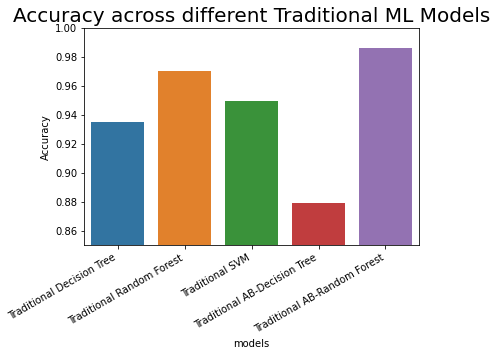

In [24]:
# Model Prediction Plots Together - Accuracy
import seaborn as sns
import matplotlib.pyplot as plt

models =['Traditional Decision Tree','Traditional Random Forest','Traditional SVM','Traditional AB-Decision Tree', 'Traditional AB-Random Forest']
Accuracy_Scores=[Accuracy_D, Accuracy_R, Accuracy_SVM, Accuracy_AD, Accuracy_ARF]


df = pd.DataFrame({"models": models, "Accuracy": Accuracy_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Accuracy", data=df)

plt.xticks(rotation=30, ha='right')
plt.ylim(0.85, 1)
plt.title('Accuracy across different Traditional ML Models',fontsize=20)

Text(0.5, 1.0, 'Precision across different Traditional ML Models')

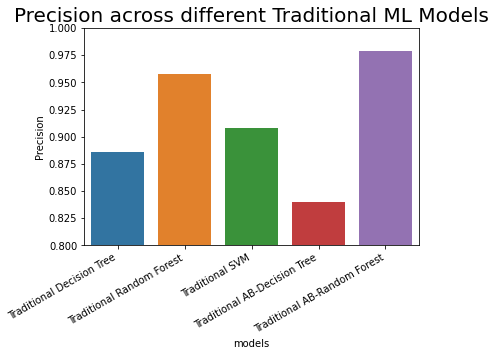

In [25]:
# Model Prediction Plots Together - Precision
import matplotlib.pyplot as plt

models =['Traditional Decision Tree','Traditional Random Forest','Traditional SVM','Traditional AB-Decision Tree', 'Traditional AB-Random Forest']
Precision_Scores=[Precision_D, Precision_R, Precision_SVM, Precision_AD, Precision_ARF]

df = pd.DataFrame({"models": models, "Precision": Precision_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Precision", data=df)
plt.xticks( rotation=30, ha='right')
plt.ylim(0.8, 1)

plt.title('Precision across different Traditional ML Models',fontsize=20)

Text(0.5, 1.0, 'Sensitivity across different Traditional ML Models')

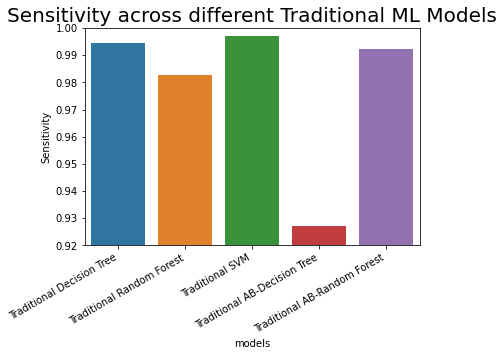

In [26]:
# Model Prediction Plots Together - Recall
import matplotlib.pyplot as plt
import seaborn as sns

models =['Traditional Decision Tree','Traditional Random Forest','Traditional SVM','Traditional AB-Decision Tree', 'Traditional AB-Random Forest']
Sensitivity_recall_Scores=[Sensitivity_recall_D, Sensitivity_recall_R, Sensitivity_recall_SVM, Sensitivity_recall_AD, Sensitivity_recall_ARF]

df = pd.DataFrame({"models": models, "Sensitivity": Sensitivity_recall_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Sensitivity", data=df)

plt.ylim(0.92, 1)
plt.xticks( rotation=30, ha='right')
plt.title('Sensitivity across different Traditional ML Models',fontsize=20)

Text(0.5, 1.0, 'F1_score across different Traditional ML Models')

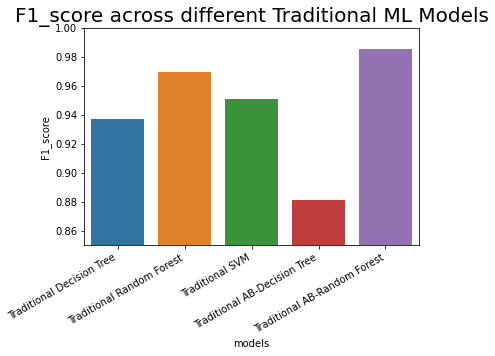

In [27]:
# Model Prediction Plots Together - F1 Score
import matplotlib.pyplot as plt
import seaborn as sns
models =['Traditional Decision Tree','Traditional Random Forest','Traditional SVM','Traditional AB-Decision Tree', 'Traditional AB-Random Forest']

F1_score_Scores=[F1_score_D, F1_score_R, F1_score_SVM, F1_score_AD, F1_score_ARF]
df = pd.DataFrame({"models": models, "F1_score": F1_score_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="F1_score", data=df)

plt.ylim(0.85, 1)
plt.xticks(rotation=30, ha='right')
plt.title('F1_score across different Traditional ML Models',fontsize=20)
